In [1]:
import numpy as np 
import pandas as pd 
import pycaret

In [9]:
# Read CSV train data file into DataFrame
frame=pd.read_csv('C:\\Users\\dicks\\Downloads\\imports-85.csv')
frame.head(5)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##### We leverage Pycaret library to automate and tune our regression model
##### Regression is used for estimating the relationships between a dependent variable ( ‘outcome variable’, or ‘target’) 
##### and one or more independent variables (often called ‘features’, ‘predictors’, or ‘covariates’)


##### This library provides several pre-processing features that prepare the data for modeling through setup function

In [12]:
#import regression module
from pycaret.regression import *
#intialize the setup
exp_reg = setup(frame, target = 'price')#Define our target columns(price)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1146
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(205, 24)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,14
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


##### This function initializes the environment in pycaret and creates the transformation pipeline to prepare the data
##### for modeling and deployment.

In [13]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,27.525800,2053.117100,43.467000,0.290800,0.867400,2.692100
1,AdaBoost Regressor,32.177200,2132.322900,44.497900,0.263600,0.884600,2.463100
2,Gradient Boosting Regressor,27.568900,2209.668100,44.580600,0.242100,0.873700,2.588400
3,Extreme Gradient Boosting,28.887900,2201.460100,45.270600,0.234500,0.884600,2.535000
4,Extra Trees Regressor,28.096900,2371.561300,46.492800,0.193400,1.008200,2.951700
5,CatBoost Regressor,28.761600,2377.812900,47.023500,0.186400,0.956700,2.922200
6,K Neighbors Regressor,34.917200,2456.808200,47.751000,0.160000,0.894300,2.916400
7,Bayesian Ridge,40.567600,2450.305200,48.880400,0.137700,0.952700,2.514500
8,Lasso Regression,39.140800,2457.652300,48.983700,0.132200,0.951200,2.554200
9,Elastic Net,40.084100,2470.467100,48.972400,0.128300,0.937300,2.571700


In [14]:
#Let's create a Random Forest Regression model
random_forest_reg  = create_model('rf') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,38.1199,4174.2774,64.6086,-0.1326,1.5327,8.5452
1,41.5810,4460.5995,66.7877,-0.5024,1.1318,3.9207
2,28.7182,1425.4021,37.7545,0.5911,1.3116,1.0891
3,22.0277,1406.5848,37.5045,0.3535,0.4802,0.2856
4,29.4872,2272.7403,47.6733,0.2720,1.2813,10.1163
5,17.3294,537.1667,23.1769,0.7842,0.6449,0.7795
6,26.6825,1843.1812,42.9323,0.2623,0.5842,0.3270
7,21.7120,1348.0753,36.7161,0.5614,0.6154,0.6172
8,19.6508,1111.2701,33.3357,0.4180,0.3499,0.1922
9,29.9490,1951.8735,44.1800,0.3006,0.7425,1.0478


In [16]:
tuned_rnd_reg = tune_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,39.5557,4012.7244,63.3461,-0.0887,1.5319,8.2483
1,42.6411,4408.4959,66.3965,-0.4849,1.1310,3.8529
2,34.4195,2113.9415,45.9776,0.3936,1.3700,1.2400
3,23.9684,1374.3959,37.0728,0.3683,0.4703,0.3398
4,30.3893,2294.4060,47.9000,0.2651,1.2490,8.7846
5,21.7492,872.1418,29.5320,0.6497,0.6987,0.9099
6,29.1835,2042.5114,45.1942,0.1825,0.5712,0.3400
7,23.0866,1312.6579,36.2306,0.5729,0.6323,0.6937
8,21.6601,1300.4944,36.0624,0.3189,0.3933,0.2109
9,29.0539,1895.0496,43.5322,0.3210,0.7400,1.0328


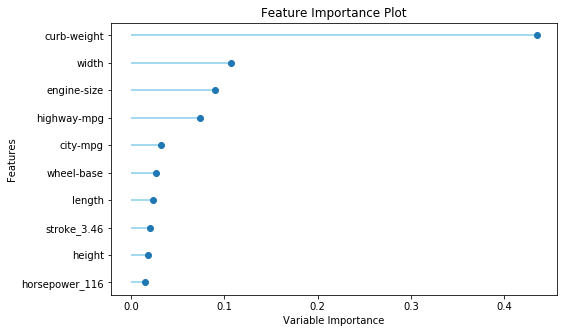

In [17]:
plot_model(estimator = tuned_rnd_reg, plot = 'feature')

In [18]:
#Let's create a AdaBoost Regression model
adaboost_reg  = create_model('ada') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,44.9073,4057.2464,63.6965,-0.1008,1.5478,8.4175
1,46.5243,4361.1704,66.0392,-0.4690,1.1401,4.0293
2,39.9631,2647.8170,51.4569,0.2405,1.4819,1.2386
3,29.8078,1484.9312,38.5348,0.3175,0.4869,0.4470
4,26.6424,1522.0755,39.0138,0.5125,1.1702,6.9692
5,21.3743,743.2782,27.2631,0.7014,0.6516,0.8104
6,24.5484,1558.9074,39.4830,0.3761,0.4877,0.2997
7,26.5445,1107.8310,33.2841,0.6395,0.6972,0.9611
8,22.7930,1240.8526,35.2257,0.3501,0.3582,0.2103
9,38.6669,2599.1199,50.9816,0.0687,0.8244,1.2476


In [19]:
tuned_adaboost_reg = tune_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,39.8952,3475.7359,58.9554,0.0570,1.5121,8.1580
1,50.2003,5089.0984,71.3379,-0.7141,1.1800,3.9180
2,36.9475,2386.0494,48.8472,0.3156,1.4355,1.1532
3,26.0662,1194.6276,34.5634,0.4510,0.4088,0.3550
4,22.2652,1187.4617,34.4596,0.6196,1.1419,6.5589
5,22.6541,810.3551,28.4667,0.6745,0.7074,0.9509
6,25.8855,1418.7801,37.6667,0.4321,0.4645,0.3436
7,26.6740,1255.6499,35.4352,0.5914,0.6716,0.8505
8,26.7571,1364.9926,36.9458,0.2851,0.3975,0.2750
9,40.1568,2865.2782,53.5283,-0.0267,0.8271,1.1944


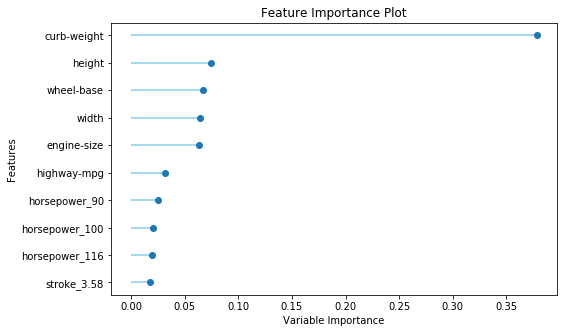

In [20]:
plot_model(estimator = tuned_adaboost_reg, plot = 'feature')

In [21]:
#Let's create a AdaBoost Regression model
GradientBoost_reg  = create_model('gbr') 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42.3615,4937.2049,70.2652,-0.3396,1.5535,8.8117
1,44.9088,5092.6878,71.3631,-0.7154,1.2040,3.9435
2,26.5407,1565.2053,39.5627,0.5510,1.3264,1.0044
3,23.4527,1714.1573,41.4024,0.2122,0.6144,0.3452
4,26.0439,1966.8481,44.3492,0.3700,1.2548,9.2526
5,14.7793,349.1668,18.6860,0.8597,0.4407,0.4038
6,23.8202,1680.8876,40.9986,0.3272,0.6112,0.3278
7,24.4556,1803.7214,42.4702,0.4131,0.6831,0.6594
8,19.3696,1130.6209,33.6247,0.4078,0.3375,0.1629
9,29.9570,1856.1815,43.0834,0.3349,0.7117,0.9732


In [22]:
tuned_GradientBoost_reg = tune_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42.4519,5110.2756,71.4862,-0.3865,1.5690,9.3305
1,40.1575,4113.8049,64.1389,-0.3856,1.1924,3.0288
2,40.1143,3532.7058,59.4366,-0.0134,1.4565,1.5413
3,23.2941,2038.6503,45.1514,0.0630,0.8703,0.3728
4,33.2912,2836.1637,53.2556,0.0915,1.3307,11.8596
5,29.5915,2142.9300,46.2918,0.1392,0.9383,1.6152
6,31.9120,2604.9458,51.0387,-0.0426,1.0741,0.4710
7,22.8760,1553.0903,39.4093,0.4947,0.6911,0.7707
8,23.0247,1115.9967,33.4065,0.4155,0.3070,0.1895
9,26.7648,1567.8342,39.5959,0.4382,0.7114,0.8798


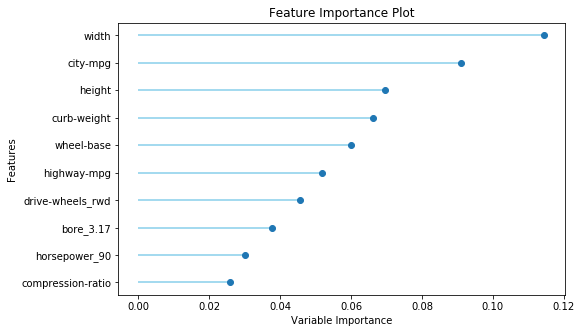

In [23]:
plot_model(estimator = tuned_GradientBoost_reg, plot = 'feature')